# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [1]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [64]:
# print(type(iris))
print(iris.keys())
print(iris.filename)
print(iris.data[0:10])
print(type(iris.data))
print(iris.target_names)
print(iris.target)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
c:\users\shell\appdata\local\programs\python\python37\lib\site-packages\sklearn\datasets\data\iris.csv
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [65]:
# we only take the first two features. 
X = iris.data[:,:2]
print(X.shape)
Y = iris.target
print(Y.shape)

(150, 2)
(150,)


In [66]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris.data, columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [67]:
print(f'target_names:{iris.target_names}')

target_names:['setosa' 'versicolor' 'virginica']


In [68]:
#建立Target欄位與資料
y = pd.DataFrame(iris.target, columns=['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [69]:
#合併資料特徵欄位與目標欄位
irisData = pd.concat([x[['sepal length (cm)', 'sepal width (cm)']], y], axis =1)

In [70]:
#只選擇目標為0與1的資料
irisData = irisData[irisData.target.isin([0,1])]
irisData

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
95,5.7,3.0,1
96,5.7,2.9,1
97,6.2,2.9,1
98,5.1,2.5,1


## 切分訓練集與測試集
> train_test_split()

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(irisData[['sepal length (cm)', 'sepal width (cm)']], irisData['target'], test_size = 0.3)

In [72]:
print(X_train.shape)
X_train.head()

(70, 2)


,sepal length (cm),sepal width (cm)
37,4.9,3.6
44,5.1,3.8
89,5.5,2.5
27,5.2,3.5
45,4.8,3.0


In [73]:
print(X_test.shape)
X_test.head()

(30, 2)


,sepal length (cm),sepal width (cm)
91,6.1,3.0
67,5.8,2.7
84,5.4,3.0
6,4.6,3.4
31,5.4,3.4


In [74]:
print(y_train.shape)
Y_train.head()

(70,)


37    0
44    0
89    1
27    0
45    0
Name: target, dtype: int32

In [75]:
print(y_test.shape)
Y_test.head()

(30,)


91    1
67    1
84    1
6     0
31    0
Name: target, dtype: int32

# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [76]:
def norm_stats(dfs):
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)


def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [82]:
stats = norm_stats(X_train)
arr_x_train = np.array(z_score(X_train, stats))
arr_x_test = np.array(z_score(X_test, stats))
arr_y_train = np.array(Y_train)
arr_y_test = np.array(Y_test)
arr_x_train[:5]

array([[-0.77691418,  0.83247799],
       [-0.43487649,  1.2609593 ],
       [ 0.24919889, -1.52416925],
       [-0.26385765,  0.61823733],
       [-0.94793303, -0.45296596]])

In [81]:
arr_x_test[:5]

array([[ 1.27531196, -0.45296596],
       [ 0.76225542, -1.09568794],
       [ 0.07818004, -0.45296596],
       [-1.28997072,  0.40399667],
       [ 0.07818004,  0.40399667]])

## use sklearn

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.35428571 3.21142857]
[0.58473088 0.46676481]


In [84]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_train_std[:5]

array([[-0.77691418,  0.83247799],
       [-0.43487649,  1.2609593 ],
       [ 0.24919889, -1.52416925],
       [-0.26385765,  0.61823733],
       [-0.94793303, -0.45296596]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [90]:
sc = StandardScaler().fit(X_test)
X_test_std = sc.transform(X_test)
print(X_test_std[:5])

[[ 0.52868684  0.42220989]
 [ 0.08399698 -0.35327766]
 [-0.50892285  0.42220989]
 [-1.6947625   1.4561933 ]
 [-0.50892285  1.4561933 ]]


In [89]:
sc.mean_
# sc.scale_

array([5.74333333, 2.83666667])

you can also use fit_transform method (i.e., fit and then transform)    

In [92]:
X_train_std = sc.fit_transform(X_train)  
X_test_std = sc.fit_transform(X_test)
print(X_train_std[:5])
print('----')
print(X_test_std[:5])

[[-0.77691418  0.83247799]
 [-0.43487649  1.2609593 ]
 [ 0.24919889 -1.52416925]
 [-0.26385765  0.61823733]
 [-0.94793303 -0.45296596]]
----
[[ 0.52868684  0.42220989]
 [ 0.08399698 -0.35327766]
 [-0.50892285  0.42220989]
 [-1.6947625   1.4561933 ]
 [-0.50892285  1.4561933 ]]


In [93]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: 0.0
std of X_train_std: 1.0


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


50.43494068813713
28.802839561508687


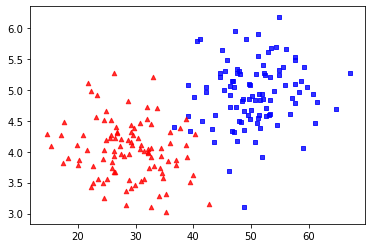

In [94]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [100]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [96]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [97]:
minmax_norm(x_val[:10])

array([0.43298081, 0.62918092, 0.373388  , 0.34884926, 0.41617038,
       0.09846427, 0.55427525, 0.        , 1.        , 0.30957626])

In [103]:
minmax_norm(x_val)[:10]

array([0.72389931, 0.76762447, 0.71061846, 0.70514975, 0.72015294,
       0.64934895, 0.75093099, 0.6274052 , 0.85026521, 0.69639737])

In [98]:
from sklearn.preprocessing import MinMaxScaler
x_val=x_val.reshape(-1, 1)
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.transform(x_val)[:10])

[67.10093691]
[[0.72389931]
 [0.76762447]
 [0.71061846]
 [0.70514975]
 [0.72015294]
 [0.64934895]
 [0.75093099]
 [0.6274052 ]
 [0.85026521]
 [0.69639737]]
